In [0]:
# imports
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
setup_google_colab.setup_week4()
import download_utils
from lfw_dataset import load_lfw_dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
download_utils.link_week_4_resources()
import tensorflow as tf
import keras
import numpy as np
import keras.layers as L
import keras_utils
from keras_utils import reset_tf_session

shred: setup_google_colab.py: failed to open for writing: No such file or directory
--2019-07-15 08:53:34--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3792 (3.7K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.70K  --.-KB/s    in 0s      

2019-07-15 08:53:39 (63.1 MB/s) - ‘setup_google_colab.py’ saved [3792/3792]

**************************************************
lfw-deepfunneled.tgz
**************************************************
lfw.tgz
**************************************************
lfw_attributes.txt


Using TensorFlow backend.


In [0]:
X_, attr = load_lfw_dataset(use_raw=True, dimx=32, dimy=32)

**************************************************



In [0]:
# Center the Image
X = X_.astype('float32') / 255.0 - 0.5

In [0]:
# Split data set
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

In [0]:
def show_image(x):
  plt.imshow(np.clip(x + 0.5, 0, 1))

In [0]:
def show_random(count=6):
  randIndices = np.random.randint(0, X.shape[0], count)
  for i in range(randIndices.shape[0]):
    plt.subplot(2,int(count/2),i+1)
    show_image(X[randIndices[i]])

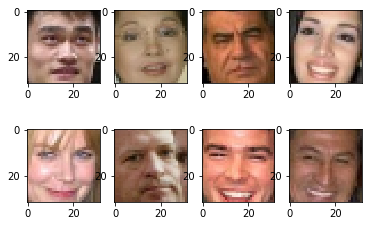

In [0]:
show_random(8)

In [0]:
def build_autoencoder(image_size, code_size):
  H,W,C = image_size
  encoder = keras.models.Sequential()
  encoder.add(L.InputLayer(image_size))
  encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="elu"))
  encoder.add(L.MaxPooling2D(pool_size=(2,2)))
  encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="elu"))
  encoder.add(L.MaxPooling2D(pool_size=(2,2)))
  encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="elu"))
  encoder.add(L.MaxPooling2D(pool_size=(2,2)))
  encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="elu"))
  encoder.add(L.MaxPooling2D(pool_size=(2,2)))
  encoder.add(L.Flatten())
  encoder.add(L.Dense(code_size, activation="elu"))

  decoder = keras.models.Sequential()
  decoder.add(L.InputLayer((code_size,)))
  decoder.add(L.Dense((2*2*256),activation='elu'))#2048
  decoder.add(L.Reshape((2, 2, 256)))
  decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
  decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
  decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
  decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, padding='same'))

  return encoder, decoder

In [0]:
IMG_SHAPE = X.shape[1:]
get_dim = lambda layer: np.prod(layer.output_shape[1:])
for code_size in [1,8,32,128,512]:
    s = reset_tf_session()
    encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=code_size)
    print("Testing code size %i" % code_size)
    assert encoder.output_shape[1:]==(code_size,),"encoder must output a code of required size"
    assert decoder.output_shape[1:]==IMG_SHAPE,   "decoder must output an image of valid shape"
    assert len(encoder.trainable_weights)>=6,     "encoder must contain at least 3 layers"
    assert len(decoder.trainable_weights)>=6,     "decoder must contain at least 3 layers"
    
    for layer in encoder.layers + decoder.layers:
        assert get_dim(layer) >= code_size, "Encoder layer %s is smaller than bottleneck (%i units)"%(layer.name,get_dim(layer))

print("All tests passed!")
s = reset_tf_session()

W0715 08:54:45.254311 140629245192064 deprecation_wrapper.py:119] From /content/keras_utils.py:68: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0715 08:54:45.256871 140629245192064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0715 08:54:45.260079 140629245192064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:82: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 08:54:45.276725 140629245192064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:84: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 08:54:45.277825 140629245192064 deprecation_wrapper.py:119] F

Testing code size 1
Testing code size 8
Testing code size 32
Testing code size 128
Testing code size 512
All tests passed!


In [0]:
s = reset_tf_session()
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=32)
encoder.summary()
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [0]:
s = reset_tf_session()

encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=32)

inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

W0715 08:55:13.068804 140629245192064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:697: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model_filename = 'autoencoder.{0:03d}.hdf5'
last_finished_epoch = None

In [0]:
autoencoder.fit(x=X_train, y=X_train, epochs=25,
                validation_data=[X_test, X_test])

W0715 08:55:18.020801 140629245192064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:602: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 11828 samples, validate on 1315 samples
Epoch 1/25
11828/11828 [==============================] - 13s - loss: 0.0121 - val_loss: 0.0084
Epoch 2/25
11828/11828 [==============================] - 7s - loss: 0.0077 - val_loss: 0.0072
Epoch 3/25
11828/11828 [==============================] - 7s - loss: 0.0072 - val_loss: 0.0070
Epoch 4/25
11828/11828 [==============================] - 7s - loss: 0.0070 - val_loss: 0.0069
Epoch 5/25
11828/11828 [==============================] - 7s - loss: 0.0069 - val_loss: 0.0068
Epoch 6/25
11828/11828 [==============================] - 7s - loss: 0.0068 - val_loss: 0.0067
Epoch 7/25
11828/11828 [==============================] - 7s - loss: 0.0067 - val_loss: 0.0066
Epoch 8/25
11828/11828 [==============================] - 7s - loss: 0.0067 - val_loss: 0.0066
Epoch 9/25
11828/11828 [==============================] - 7s - loss: 0.0066 - val_loss: 0.0065
Epoch 10/25
11828/11828 [==============================] - 7s - loss: 0.0065 - val_loss: 0.0065

In [0]:
autoencoder.evaluate(X_test, X_test)

1312/1315 [============================>.] - ETA: 0s

0.005558009826695058

In [0]:
def visualise(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]  # img[None] is the same as img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


In [0]:
def visualise_random(count=6):
  randIndices = np.random.randint(0, X_test.shape[0], count)
  for i in range(count):
    img = X_test[randIndices[i]]
    visualise(img,encoder,decoder)

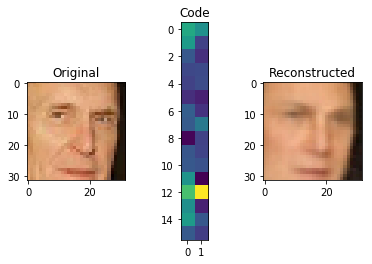

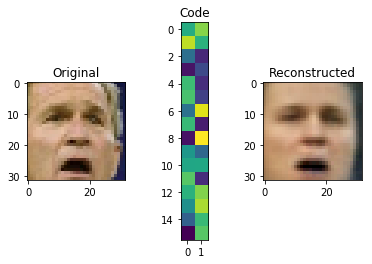

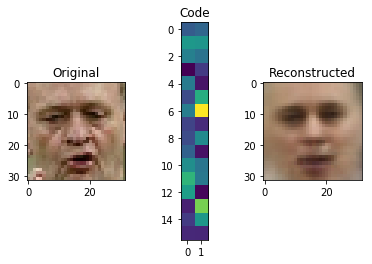

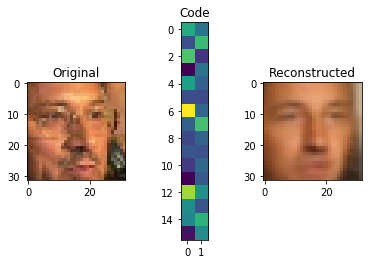

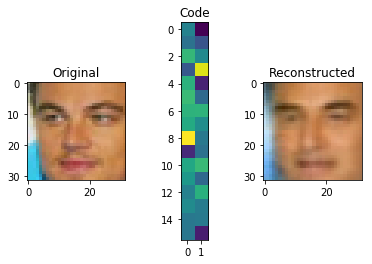

In [0]:
visualise_random(5)